# 상관관계 시각화

### 산점도행렬
* 두개이상의 변수가 있는 데이터에서 변수들 간의 산점도 그린 그래프
* pandas.plotting 에서는 산점도와 함께 각 변수의 밀도 그래프(KDE, histogram)을 함께 그려 데이터의 분포와 변수들 간의 관계를 함께 살펴볼 수 있다
    * kde(kernel density estimator)
        *  히스토그램과 함께 non-parametric 밀도 추정 방법
        *  bin 의 크기와 시작, 종료 위치에 따라 그래프가 달라지는 히스토그램의 문제점을 개선한 방법
        *  커널함수를 사용하여 데이터분포를 smooth 하게 나타낸 것
  </br></br>
* 산점도 행렬 해석 방법
    * 대각선의 히스토그램을 통해 이상치를 확인
    * 종속변수와 설명변수들 간의 관계를 시각적으로 판단
    * 종속변수가 수치형인 경우 각 설명 변수와의 직선 상관관계를 비교
    * 종속변수가 범주형인 경우 종속변수를 잘 구분하는 변수를 파악
    * 설명변수 간의 직선 함수관계를 파악하여 다중공선성 문제를 진단
</br></br>
* scatter_matrix(data, alpha = 0.5, figsize = (8,8), diagonal = 'hist')
    * data : 데이터프레임
    * alpha : 투명도
    * figsize : 그래프 크기
    * diagonal : 대각선의 밀도 그래프 종류 (hist, kde) 

In [12]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris['Class'] = load_iris().target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris['Class'] = iris['Class'].map({0:'Setona', 1: 'Versicolour', 2:'Virginica'})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setona
1,4.9,3.0,1.4,0.2,Setona
2,4.7,3.2,1.3,0.2,Setona
3,4.6,3.1,1.5,0.2,Setona
4,5.0,3.6,1.4,0.2,Setona
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


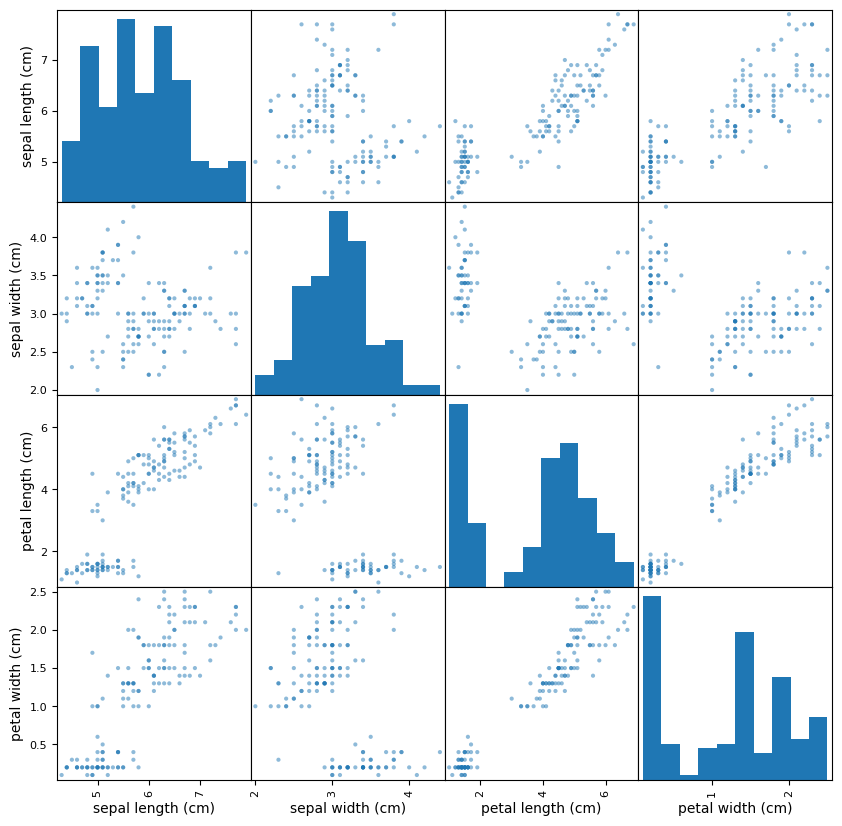

In [13]:
scatter_matrix(iris, alpha = 0.5, figsize = (10,10), diagonal = 'hist')
plt.show()

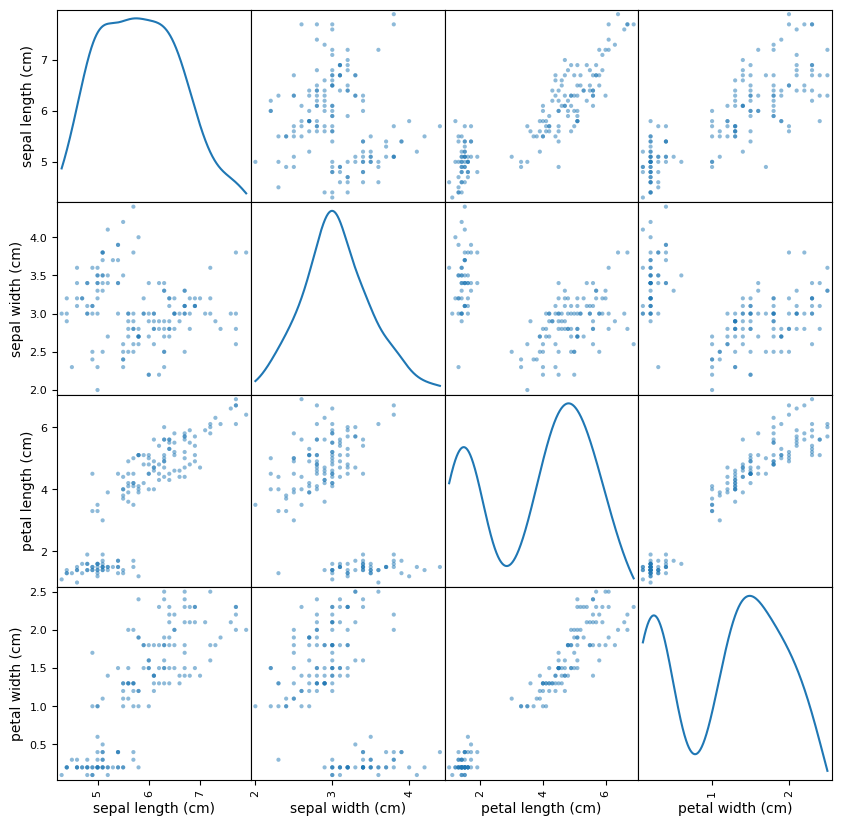

In [14]:
scatter_matrix(iris, alpha = 0.5, figsize = (10,10), diagonal = 'kde')
plt.show()

* target 별 값이 차이가 나는 데이터에 대해서 target 범주별 색깔을 다르게 지정하여 그리기 가능
* sns.pairplot(data, diag_kind = 'auto', hue = 'target 컬럼명')
    * data : 데이터프레임
    * diag_kind : 대각선 밀도 그래프 종류 (auto, hist, kde)
    * hue : 색을 구분할 타깃 변수 

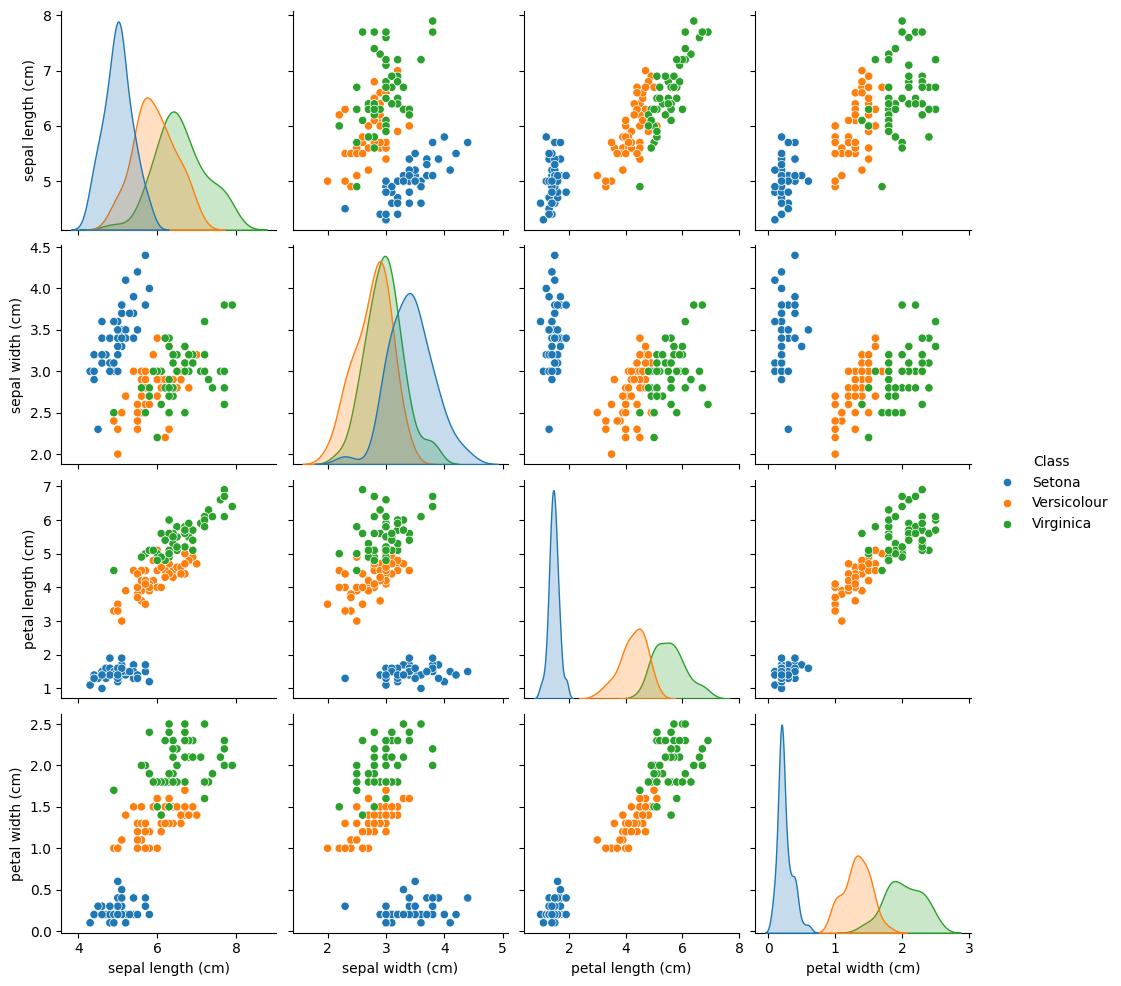

In [15]:
import seaborn as sns
sns.pairplot(iris, diag_kind = 'auto', hue = 'Class')
plt.show()

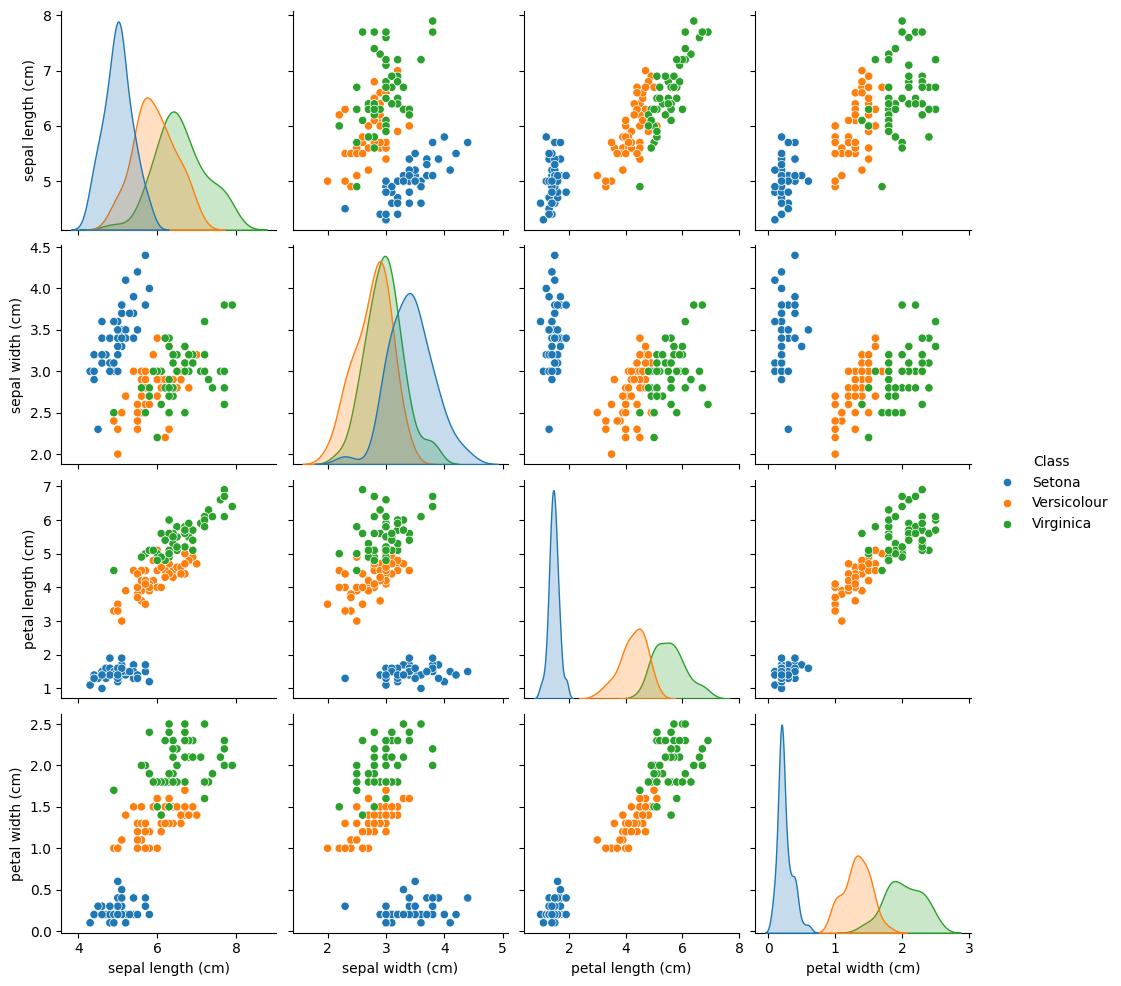

In [17]:
sns.pairplot(iris, diag_kind = 'kde', hue = 'Class')
plt.show()

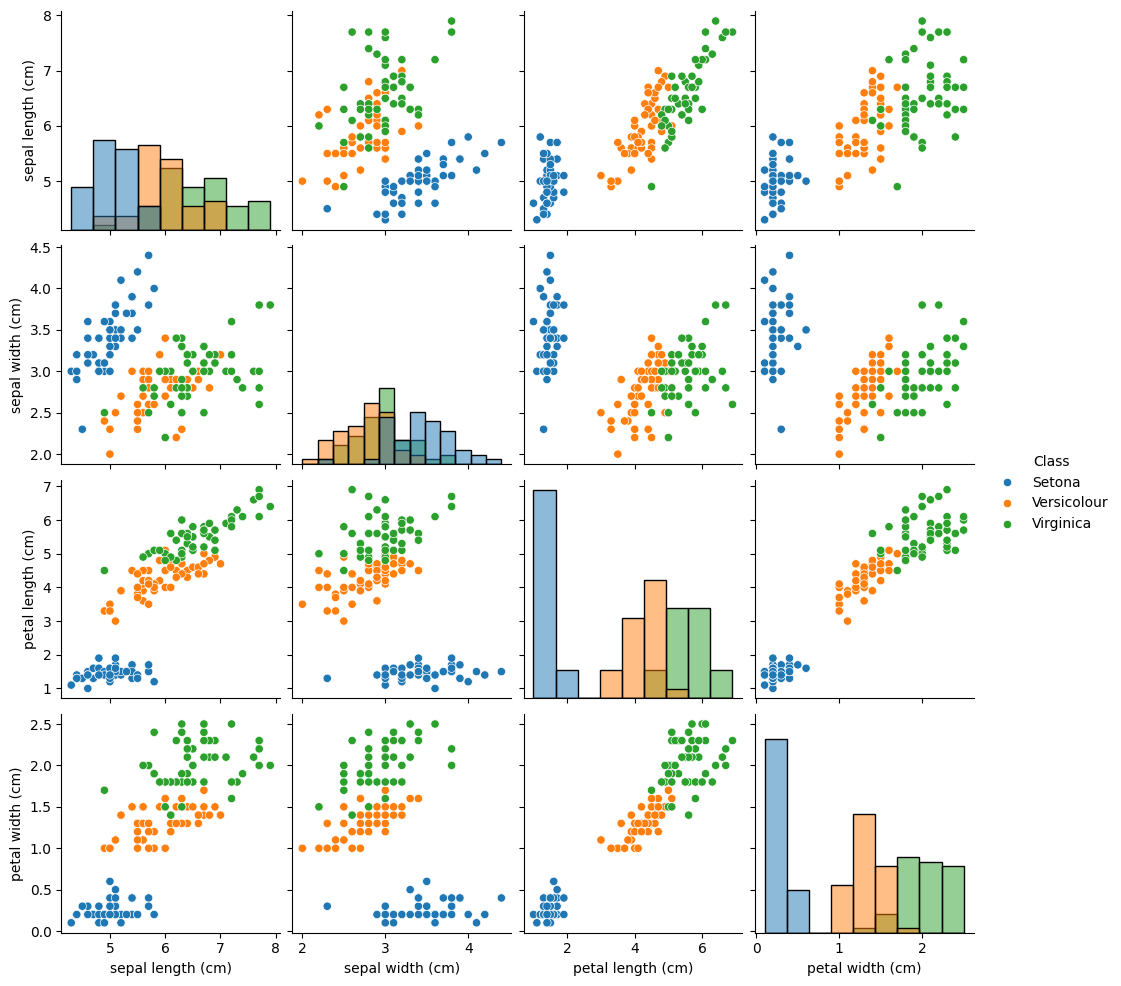

In [16]:
sns.pairplot(iris, diag_kind = 'hist', hue = 'Class')
plt.show()

### 상관계수 행렬
* 다수 변수간 상관관계를 파악하거나 독립변수 간 다중공선성을 파악하고자 할 때 사용하는 분석기법
* 일부 데이터 분석 기법에서는 다중공선성이 높은 독립변수를 제거하거나 정제하는데, 이때 상관계수 행렬그래프를 그려 다중공선성이 높은 독립변수 쌍을 직관적으로 파악
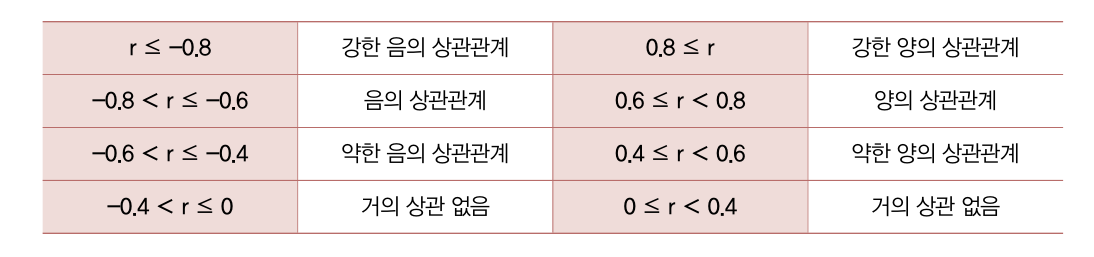

* data = data.corr(method = 'pearson')
    * method : 상관분석 방법 (pearson, kendall, spearman)
</br></br>
* 상관행렬 생성후에는 heatmap()을 사용하여 시각화
* sns.heatmap(data, xticklabels = data.columns, yticklabels = data.columns, cmap = 'RdBu_r', annot = True)
    * data : 상관행렬을 그릴 데이터의 상관계수 데이터 프레임
    * xticklabels : x축 라벨명
    * yticklabels : y축 라벨명
    * cmap : 히트맵의 색깔지정
    * annot : True 일 경우 상관계수를 텍스트로 표시 

In [20]:
iris_corr = iris.drop(columns = 'Class').corr(method = 'pearson')
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


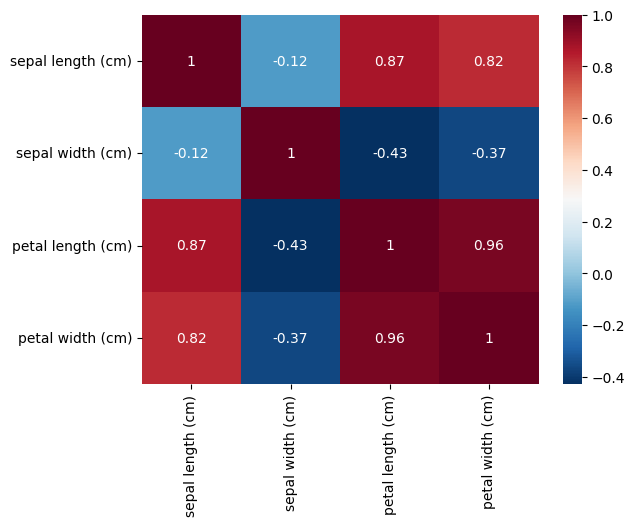

In [24]:
sns.heatmap(iris_corr, xticklabels = iris_corr.columns, yticklabels = iris_corr.columns, cmap = 'RdBu_r', annot = True)
plt.show()

In [25]:
iris_corr = iris.drop(columns = 'Class').corr(method = 'kendall')
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.076997,0.718516,0.655309
sepal width (cm),-0.076997,1.000000,-0.185994,-0.157126
petal length (cm),0.718516,-0.185994,1.000000,0.806891
petal width (cm),0.655309,-0.157126,0.806891,1.000000


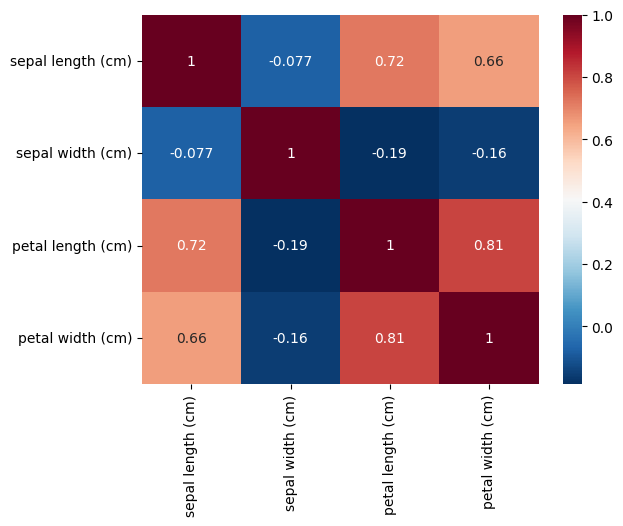

In [26]:
sns.heatmap(iris_corr, xticklabels = iris_corr.columns, yticklabels = iris_corr.columns, cmap = 'RdBu_r', annot = True)
plt.show()

In [27]:
iris_corr = iris.drop(columns = 'Class').corr(method = 'spearman')
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.166778,0.881898,0.834289
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032
petal length (cm),0.881898,-0.309635,1.000000,0.937667
petal width (cm),0.834289,-0.289032,0.937667,1.000000


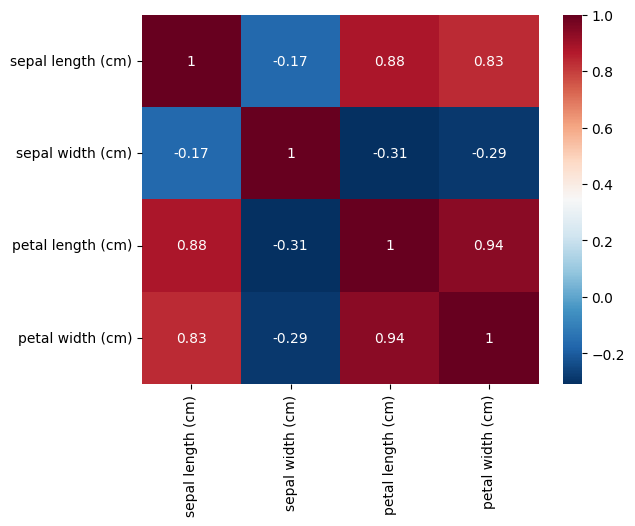

In [28]:
sns.heatmap(iris_corr, xticklabels = iris_corr.columns, yticklabels = iris_corr.columns, cmap = 'RdBu_r', annot = True)
plt.show()